In [9]:
import numpy as np
import pandas as pd

def optimize(data, max_iter, num_agents):
    # Initialize the positions of the agents randomly
    positions = np.random.uniform(0, 1, (num_agents, data.shape[0], data.shape[1]-1))
    
    # Initialize the best position and value
    best_position = None
    best_value = 0
    
    # Iterate for a maximum of max_iter times
    for i in range(max_iter):
        # Calculate the value of A and C for this iteration
        A = 2 - 2 * i / max_iter
        C = 2 * np.random.uniform(0, 1, size=(data.shape[1]-1)) - 1
        
        # Iterate over all the agents (whales)
        for j in range(num_agents):
            # Select a random agent (whale) to use as the base position
            r = np.random.randint(num_agents)
            
            # Calculate the distance between the agent and the random agent
            distance = np.abs(positions[j] - positions[r])
            
            # Calculate the new position using the formula
            # X(t+1) = X(t) + A * D * (C * X(t) - X(i))
            # where D is the distance between the agent and the random agent
            # and C is a random vector
            if j == 0:
                positions[j] = np.clip(positions[j] + A * distance * np.abs(C * positions[j] - positions[j]), 0, 1)
            else:
                x_rand = data.iloc[np.random.randint(data.shape[0])].values[:-1].reshape(1, -1)
                positions[j] = np.clip(x_rand + A * distance * np.abs(C * x_rand - positions[j]), 0, 1)
                
            # Evaluate the fitness of the new position
            fitness = np.max(np.prod(np.abs(data.values[:, :-1] - positions[j]), axis=1) * data.values[:, -1])
            
            # Update the best position and value if necessary
            if fitness > best_value:
                best_position = positions[j].copy()
                best_value = fitness
                
    # Save the optimized data to a new CSV file
    optimized_data = pd.DataFrame(np.concatenate([best_position, data.iloc[:, -1:].values], axis=1))
    optimized_data.to_csv("optimized_data.csv", index=False)
    
    return optimized_data


In [10]:
# Load the dataset
df = pd.read_csv('chitradurga.csv')
# Set the maximum number of iterations and the number of agents
max_iter = 100
num_agents = 10
# Optimize the dataset and save the optimized data to a new CSV file
optimized_data = optimize(df, max_iter, num_agents)


In [11]:
#Load the optimized dataset and print the first 5 rows
df_optimized = pd.read_csv('optimized_data.csv')
print(df_optimized.head())


          0         1         2         3         4      5
0  0.588336  1.000000  1.000000  0.131431  1.000000  0.144
1  0.978258  0.115609  0.625681  0.127577  0.831644  0.144
2  0.243168  0.408515  0.918827  0.436489  1.000000  0.144
3  0.290221  0.626820  0.959237  1.000000  0.404682  0.144
4  0.481041  1.000000  0.663010  1.000000  1.000000  0.144


In [13]:
#rename the columns with temperature_2m,relativehumidity_2m,rain,soil_temperature_0_to_7cm,soil_moisture
df_optimized.columns = ['time','temperature_2m', 'relativehumidity_2m', 'rain', 'soil_temperature_0_to_7cm', 'soil_moisture']
print(df_optimized.head())


       time  temperature_2m  relativehumidity_2m      rain   
0  0.588336        1.000000             1.000000  0.131431  \
1  0.978258        0.115609             0.625681  0.127577   
2  0.243168        0.408515             0.918827  0.436489   
3  0.290221        0.626820             0.959237  1.000000   
4  0.481041        1.000000             0.663010  1.000000   

   soil_temperature_0_to_7cm  soil_moisture  
0                   1.000000          0.144  
1                   0.831644          0.144  
2                   1.000000          0.144  
3                   0.404682          0.144  
4                   1.000000          0.144  


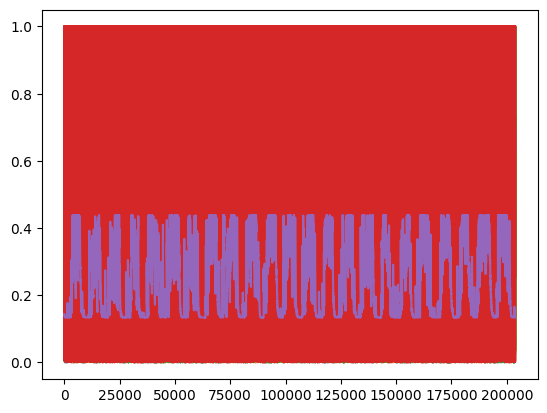

In [14]:
#plot the graph for temperature_2m,relativehumidity_2m,rain,soil_temperature_0_to_7cm,soil_moisture
import matplotlib.pyplot as plt
plt.plot(df_optimized['temperature_2m'])
plt.plot(df_optimized['relativehumidity_2m'])
plt.plot(df_optimized['rain'])
plt.plot(df_optimized['soil_temperature_0_to_7cm'])
plt.plot(df_optimized['soil_moisture'])
plt.show()


In [15]:
#save the data to csv file
df_optimized.to_csv('optimized_data_named.csv',index=False)